In [17]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


def load_images(base_path):
    X = []  # 存储图片数据
    y = []  # 存储标签
    for label in range(1, 5):  # 有四个类别的图片
        path = os.path.join(base_path, f"pcb{label}/Data/Images/Anomaly")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            image = Image.open(img_path).convert('L')  # 转换为灰度图
            image = image.resize((64, 64))  # 调整图片大小
            image_array = np.array(image).flatten()  # 将图片转换为一维数组
            X.append(image_array)
            y.append(label-1)
    return np.array(X), np.array(y)

# 加载数据
X, y = load_images('')
train_accuracies = []
test_accuracies = []

# 数据预处理
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 训练SVM分类器
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

train_acc = accuracy_score(y_train, svm.predict(X_train))
test_acc = accuracy_score(y_test, svm.predict(X_test))
train_accuracies.append(train_acc)
test_accuracies.append(test_acc)



In [20]:
print(train_accuracies)

[1.0]


In [21]:
print(test_accuracies)

[1.0]


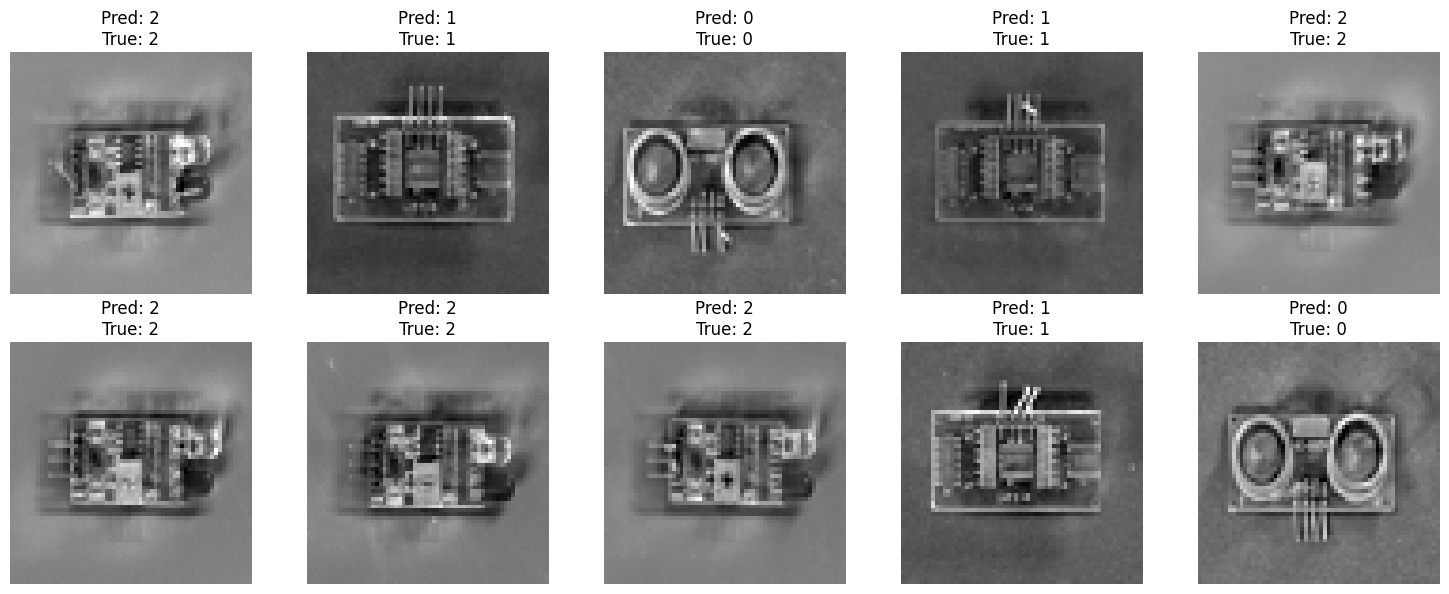

In [19]:
import matplotlib.pyplot as plt

# 假设 svm 是你已经训练好的模型
# X_test_scaled 是缩放处理过的测试图片数据
# y_test 是测试图片的真实标签

# 获取预测标签
y_pred = svm.predict(X_test)

# 选择要可视化的图片数量
num_images = 10

# 随机选择一些图片进行可视化
selected_indices = np.random.choice(X_test.shape[0], size=num_images, replace=False)

# 绘制图片和标签
plt.figure(figsize=(15, 6))
for i, index in enumerate(selected_indices, 1):
    plt.subplot(2, num_images//2, i)
    img = X_test[index].reshape(64, 64)  # 假设图片是64x64大小
    plt.imshow(img, cmap='gray')
    plt.title(f"Pred: {y_pred[index]}\nTrue: {y_test[index]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('result_classification.png',transparent = True)
plt.show()


In [16]:
print(train_accuracies)

[1.0]
